# DBSCAN on Synthetic Data

## 1. Generating Synthetic Blob Data

We create synthetic data using scikit-learn's `make_blobs` function to demonstrate DBSCAN clustering:

- **n_samples=750**: Total number of data points
- **centers=[[1, 1], [-1, -1], [1, -1]]**: Three cluster centers
- **cluster_std=0.4**: Standard deviation of clusters (controls spread)
- **random_state=0**: For reproducible results

The data is then standardized using `StandardScaler` to ensure features are on the same scale.


In [2]:
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from matplotlib import pyplot as plt

centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(
    n_samples=750, centers=centers, cluster_std=0.4, random_state=0
)

X = StandardScaler().fit_transform(X)

df = pd.DataFrame({"f1": X[:, 0], "f2": X[:, 1]})
df.head()

,f1,f2
0,0.494261,1.451067
1,-1.428081,-0.837064
2,0.338559,1.038759
3,0.119001,-1.053976
4,1.122425,1.774937


## 2. Visualizing Raw Synthetic Data

This scatter plot shows our synthetic dataset before clustering. We can see three distinct blob-like clusters, which makes this an ideal dataset for testing clustering algorithms.


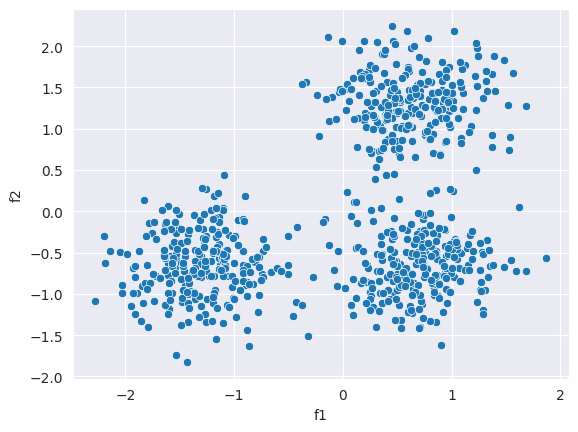

In [3]:
sns.scatterplot(df, x="f1", y='f2')
plt.show()

## 3. Applying DBSCAN to Synthetic Data

### Parameter Selection for Synthetic Data

For this synthetic dataset, we use different DBSCAN parameters:
- **eps=0.3**: Smaller epsilon value suitable for standardized data
- **min_samples=10**: Higher minimum samples to ensure robust clusters

These parameters are chosen based on the density and scale of our synthetic data.


In [5]:
from sklearn.cluster import DBSCAN

ds = DBSCAN(eps=0.3, min_samples=10)
ds.fit(df[["f1", "f2"]])
df['cluster'] = ds.labels_
df.head()

,f1,f2,cluster
0,0.494261,1.451067,0
1,-1.428081,-0.837064,1
2,0.338559,1.038759,0
3,0.119001,-1.053976,2
4,1.122425,1.774937,0


## 4. Analyzing Cluster Distribution

The `value_counts()` output shows:
- **Clusters 0, 1, 2**: Successfully identified the three main clusters with roughly equal sizes
- **Cluster -1**: Noise points (18 points) that don't belong to any dense cluster

This demonstrates DBSCAN's ability to separate the main clusters while identifying outliers.


In [6]:
df.cluster.value_counts()

cluster
 2    245
 1    244
 0    243
-1     18
Name: count, dtype: int64

## 5. DBSCAN Results Visualization

The final colored scatter plot clearly shows:
- **Three distinct clusters**: Each represented by a different color
- **Noise points**: Shown in a separate color (typically darker)
- **Clean separation**: DBSCAN successfully identified the natural groupings in our synthetic data

**Comparison with Original Centers:**
The algorithm successfully recovered the three clusters we originally created, demonstrating DBSCAN's effectiveness on well-separated, density-based clusters.


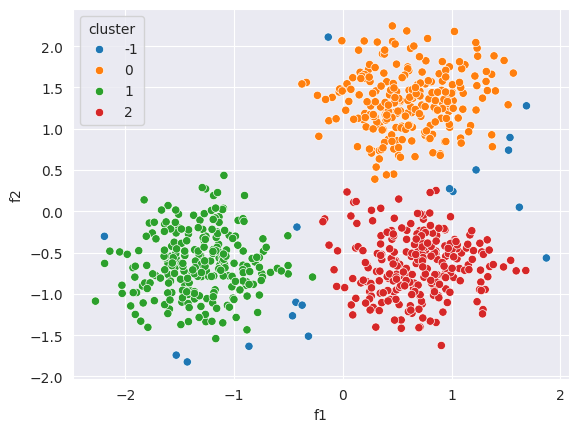

In [7]:
sns.scatterplot(df, x="f1", y='f2', palette="tab10", hue="cluster")
plt.show()